In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../CatVsDog/input"))

['test', 'train']


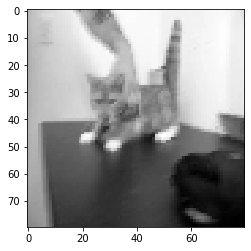

In [7]:
main_dir = "../CatVsDog/input/"
train_dir = "train"
path = os.path.join(main_dir,train_dir)

for p in os.listdir(path):
    category = p.split(".")[0]
    img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
    new_img_array = cv2.resize(img_array, dsize=(80, 80))
    plt.imshow(new_img_array,cmap="gray")
    break

In [8]:
X = []
y = []
convert = lambda category : int(category == 'dog')
def create_test_data(path):
    for p in os.listdir(path):
        category = p.split(".")[0]
        category = convert(category)
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X.append(new_img_array)
        y.append(category)

In [9]:
create_test_data(path)
X = np.array(X).reshape(-1, 80,80,1)
y = np.array(y)

In [10]:
#import pickle

#pickle.dump( X, open( "train_x", "wb" ) )
#pickle.dump( y, open( "train_y", "wb" ) )

In [11]:
#Normalize data
X = X/255.0

In [12]:
model = Sequential()
# Adds a densely-connected layer with 64 units to the model:
model.add(Conv2D(64,(3,3), activation = 'relu', input_shape = X.shape[1:]))
model.add(MaxPooling2D(pool_size = (2,2)))
# Add another:
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
# Add a softmax layer with 10 output units:
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [13]:
model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 17s 839us/sample - loss: 0.6185 - acc: 0.6652 - val_loss: 0.8968 - val_acc: 0.4710
Epoch 2/10
20000/20000 [==============================] - 14s 713us/sample - loss: 0.5228 - acc: 0.7439 - val_loss: 0.6035 - val_acc: 0.6870
Epoch 3/10
20000/20000 [==============================] - 14s 714us/sample - loss: 0.4582 - acc: 0.7829 - val_loss: 0.4567 - val_acc: 0.8098
Epoch 4/10
20000/20000 [==============================] - 14s 714us/sample - loss: 0.4026 - acc: 0.8162 - val_loss: 0.6603 - val_acc: 0.6866
Epoch 5/10
20000/20000 [==============================] - 14s 720us/sample - loss: 0.3480 - acc: 0.8438 - val_loss: 0.7119 - val_acc: 0.6642
Epoch 6/10
20000/20000 [==============================] - 14s 711us/sample - loss: 0.2893 - acc: 0.8734 - val_loss: 0.8123 - val_acc: 0.6516
Epoch 7/10
20000/20000 [==============================] - 14s 712us/sample - loss: 0.2229 - acc: 0.9096 -

In [22]:
train_dir = "test"
path = os.path.join(main_dir,train_dir)
#os.listdir(path)

X_test = []
id_line = []
def create_test1_data(path):
    for p in os.listdir(path):
        id_line.append(p.split(".")[0])
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X_test.append(new_img_array)
        
create_test1_data(path)
dem = X_test
X_test = np.array(X_test).reshape(-1,80,80,1)
X_test = X_test/255.0

In [16]:
predictions = model.predict(X_test)

In [17]:
predicted_val = [int(round(p[0])) for p in predictions]

In [18]:
submission_df = pd.DataFrame({'id':id_line, 'label':predicted_val})

In [19]:
submission_df.to_csv("submission.csv", index=False)

In [21]:
print(X_test[0])

[[[0.23921569]
  [0.21960784]
  [0.23529412]
  ...
  [0.4       ]
  [0.42745098]
  [0.4       ]]

 [[0.21568627]
  [0.23529412]
  [0.24705882]
  ...
  [0.38431373]
  [0.41960784]
  [0.37647059]]

 [[0.19215686]
  [0.22745098]
  [0.22745098]
  ...
  [0.36470588]
  [0.39607843]
  [0.36078431]]

 ...

 [[0.76470588]
  [0.7372549 ]
  [0.74509804]
  ...
  [0.42352941]
  [0.47843137]
  [0.49411765]]

 [[0.74901961]
  [0.76470588]
  [0.76470588]
  ...
  [0.79607843]
  [0.60784314]
  [0.45490196]]

 [[0.70196078]
  [0.7372549 ]
  [0.74509804]
  ...
  [0.50588235]
  [0.70588235]
  [0.34117647]]]
